# Two Sample t-test

Two-sample tests are appropriate for comparing two samples, typically experimental and control samples from a scientifically controlled experiment.

https://en.wikipedia.org/wiki/Test_statistic

### Independent Two-Sample t-test (Equal Variance)

Equal sample sizes and variance
Given two groups (1, 2), this test is only applicable when:

the two sample sizes (that is, the number n of participants of each group) are equal;
it can be assumed that the two distributions have the same variance;
Violations of these assumptions are discussed below.

The t statistic to test whether the means are different can be calculated as follows:
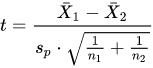

where
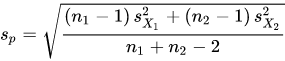

Here sp is the pooled standard deviation for n = n1 = n2 and s 2
X1 and s 2
X2 are the unbiased estimators of the variances of the two samples. The denominator of t is the standard error of the difference between two means.

For significance testing, the degrees of freedom for this test is 2n − 2 where n is the number of participants in each group.

Equal or unequal sample sizes, similar variances (sX1 > 2sX2 or sX2 > 2sX1)

This test is used only when it can be assumed that the two distributions have the same variance. (When this assumption is violated, see below.) The previous formulae are a special case of the formulae below, one recovers them when both samples are equal in size: n = n1 = n2.

The t statistic to test whether the means are different can be calculated as follows:
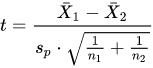
where
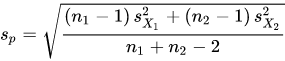

is an estimator of the pooled standard deviation of the two samples: it is defined in this way so that its square is an unbiased estimator of the common variance whether or not the population means are the same. In these formulae, ni − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

### Independent Two-Sample t-test (Un-equal Variance)

Equal or unequal sample sizes, unequal variances (sX1 > 2sX2 or sX2 > 2sX1)
Main article: Welch's t-test
This test, also known as Welch's t-test, is used only when the two population variances are not assumed to be equal (the two sample sizes may or may not be equal) and hence must be estimated separately. The t statistic to test whether the population means are different is calculated as:
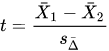

where
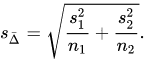

Here si2 is the unbiased estimator of the variance of each of the two samples with ni = number of participants in group i (1 or 2). In this case {\textstyle (s_{\bar {\Delta }})^{2}}{\textstyle (s_{\bar {\Delta }})^{2}} is not a pooled variance. For use in significance testing, the distribution of the test statistic is approximated as an ordinary Student's t-distribution with the degrees of freedom calculated using
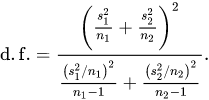

This is known as the Welch–Satterthwaite equation. The true distribution of the test statistic actually depends (slightly) on the two unknown population variances (see Behrens–Fisher problem).


In [1]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Example 1: 

Samples from two machines A and B have the following volumes in bottles. (assume equal variance)

Machine A: 150, 152, 154, 152, 151

Machine B: 156, 155, 158, 155, 154

Is the mean different? Calculate with 95% confidence.


In [3]:
machine1 = [150, 152, 154, 152, 151]
machine2 = [156, 155, 158, 155, 154]

In [5]:
t_stat, p_value = stats.ttest_ind(a= machine1, b=machine2, equal_var=True)

In [6]:
print(f"""
The t-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: -4.005551702879929
The p-value is: 0.003919295477128331 

Ho is rejected in favour of Ha


##### Example 2: 

Samples from two machines A and B have the following volumes in bottles. unequal variance

Machine A: 150, 152, 154, 152, 151

Machine C: 144, 162, 177, 150, 140

Is the mean different? Calculate with 95% confidence.


In [8]:
machine1 = [150, 152, 154, 152, 151]
machine3 = [144, 162, 177, 150, 140]

In [9]:
t_stat, p_value = stats.ttest_ind(a=machine1, b=machine3, equal_var=False)

In [10]:
print(f"""
The t-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: -0.4146442144313621
The p-value is: 0.699289145758865 

Failed to reject Ho


#### Example 3
Energy intake in mJ (millijoule) and wether obese or not (0=obese, 1=lean)

In [11]:
energ = np.array([
[9.21, 0],
[7.53, 1],
[7.48, 1],
[8.08, 1],
[8.09, 1],
[10.15, 1],
[8.40, 1],
[10.88, 1],
[6.13, 1],
[7.90, 1],
[11.51, 0],
[12.79, 0],
[7.05, 1],
[11.85, 0],
[9.97, 0],
[7.48, 1],
[8.79, 0],
[9.69, 0],
[9.68, 0],
[7.58, 1],
[9.19, 0],
[8.11, 1]])

In [25]:
gp1 = [energ_e[0]  for energ_e in energ if energ_e[1]==1]
gp2 = [energ_e[0]  for energ_e in energ if energ_e[1]==0]
gp1, gp2

([7.53,
  7.48,
  8.08,
  8.09,
  10.15,
  8.4,
  10.88,
  6.13,
  7.9,
  7.05,
  7.48,
  7.58,
  8.11],
 [9.21, 11.51, 12.79, 11.85, 9.97, 8.79, 9.69, 9.68, 9.19])

In [8]:
# Seperating the data into 2 groups
gp1 = energ[ energ[:, 1] == 1][:,0]
gp2 = energ[ energ[:, 1] == 0][:, 0]
gp1, gp2

(array([ 7.53,  7.48,  8.08,  8.09, 10.15,  8.4 , 10.88,  6.13,  7.9 ,
         7.05,  7.48,  7.58,  8.11]),
 array([ 9.21, 11.51, 12.79, 11.85,  9.97,  8.79,  9.69,  9.68,  9.19]))

In [26]:
# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene)
# independent groups: e.g., how boys and girls fare at an exam
# dependent groups: e.g., how the same class fare at 2 different exams
t_stat, p_value = ttest_ind(gp1, gp2)
print(t_stat, p_value)

-3.9455649161549835 0.0007989982111700593


In [27]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.0007989982111700593


In [28]:
print(f"""
The t-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The t-Statistic is: -3.9455649161549835
The p-value is: 0.0007989982111700593 

Ho is rejected in favour of Ha
